# Optimal Portfolio
This notebook construct 3 different optimal portfolios. The maximum sharpe-ratio portfolio (*simple risk adjusted return*), the maximum calmar-ratio portfolio (*maximum drawdown adjusted return*) and the minimum variance portfolio.

\begin{align}
    \text{Sharpe Ratio}&=\frac{R_{p}-R_{f}}{\sigma_{p}}\\
    \text{Calmar Ratio}&=\frac{R_{p}-R_{f}}{\text{Maximum Drawdown}}
\end{align}
where $R_{p}$ denotes the portfolio's annualized return, $R_{f}$ denotes the risk-free interest rate, $\sigma_{p}$ denotes the standard deviation ($\approx$*risk*) of the portfolio and maximum drawdown is measured as the pct.-change from trough to peak, i.e. peak-value minus trough-value divided by peak-value.




In [2]:
############## Loading relevant packages ##############
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# local module
import pftools
import VaR_and_ES as vares
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Loading and cleaning data
In this notebook, data can be fetched using the downloaded CSV-files or using the yahoo database.

In [12]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA' ,'SXRP', 'SXRL', 'XJSE']
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA' ]

# getting data from a local csv-file
df, rdf, cdf = pftools.df_generator(tickers,'csv','C:/Users/olufk/OneDrive/Documents/GitHub/PortfolioDesign/PortfolioDesign/OptimalPF/Data_Investing_com/')

Will eventually output description of each ticker in df


In [11]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['FORTUM.HE', 'SAF.PA', 'WM','AMD', 'ASML.AS', 'FB', 'SE', '600887.SS', 'SHOP']

# enter time period of interest
start = dt.datetime(2014, 6, 30)
end = dt.datetime(2019, 6, 30)

# getting data from yahoo database
df, rdf, cdf = pftools.df_generator(tickers,'yahoo')

No starttime selected, has therefore chosen default closest to (5 years before today) 2016-09-07
No endtime selected, has therefore chosen default which is the latest trading day 2021-09-06
Will eventually output description of each ticker in df


## Describing each tickers
Now that data is loaded, it's time to get an idea of the characteristics of the tickers

C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


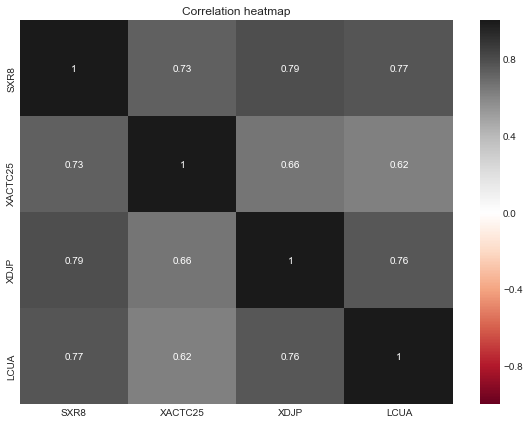

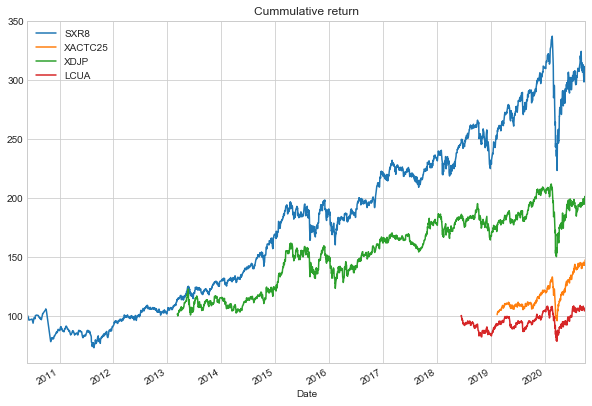

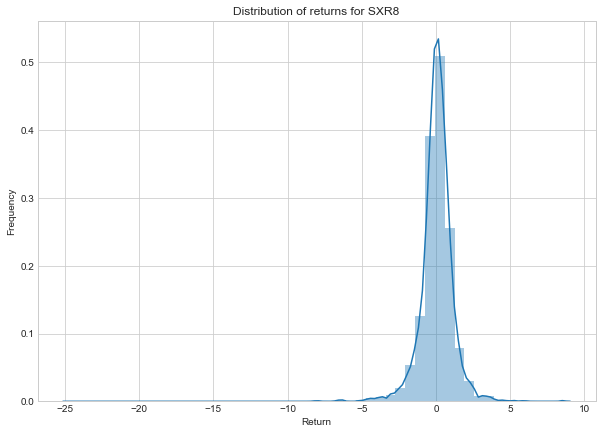

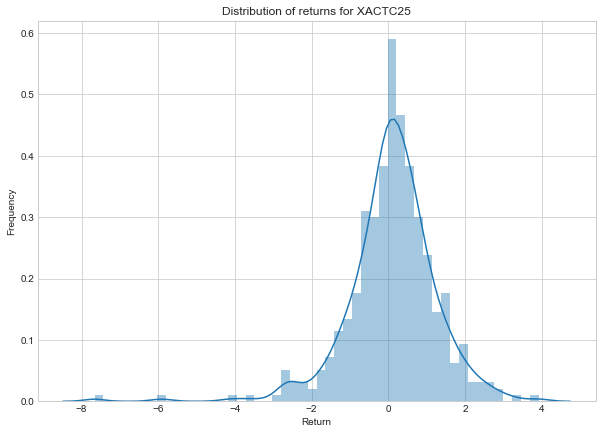

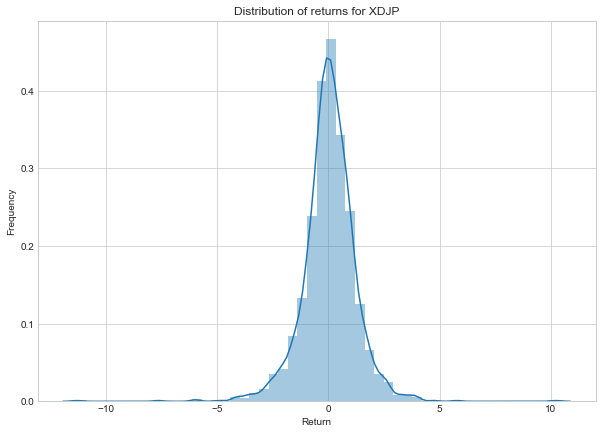

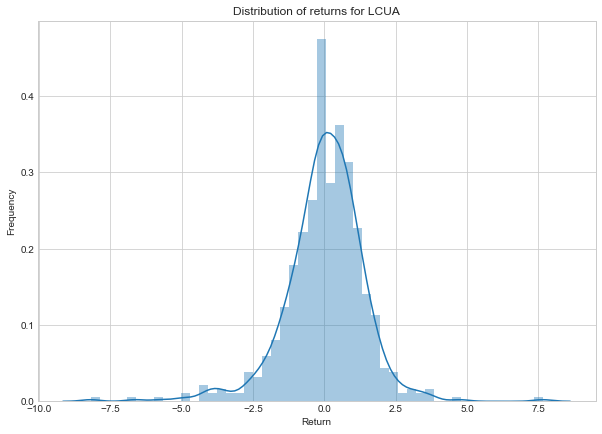

,Ticker,annualized_return,volatility,sharpe_ratio,calmar_ratio
0,SXR8,7.88,18.55,0.42,0.32
1,XACTC25,17.67,18.46,0.96,2.31
2,XDJP,6.50,19.11,0.34,0.57
3,LCUA,2.03,22.31,0.09,0.25


In [13]:
pftools.desc_ticks(df,rdf,cdf)

In [14]:
omega_hat, alpha_hat, ll = vares.ARCH1_est('XACTC25',df)

Estimating XACTC25 as a ARCH(1)-model resulted in:
--------------------------------------------------------------------------------------
Omega^hat                       --> 0.8272 with std. errors (0.0601) and t-val 13.7586
alpha^hat                       --> 0.4166 with std. errors (0.0714) and t-val 5.8369
Maximized log-likelihood        --> -483.797
--------------------------------------------------------------------------------------


Risk measures for XACTC25 at 2 period losses with a 0.05 risk level is
-----------------------------------------
Gauss
-----
VaR                             --> 2.72
ES                              --> 3.41
-----------------------------------------
ARCH(1)
------
VaR (average)                   --> 2.64
ES  (average)                   --> 3.35
-----------------------------------------


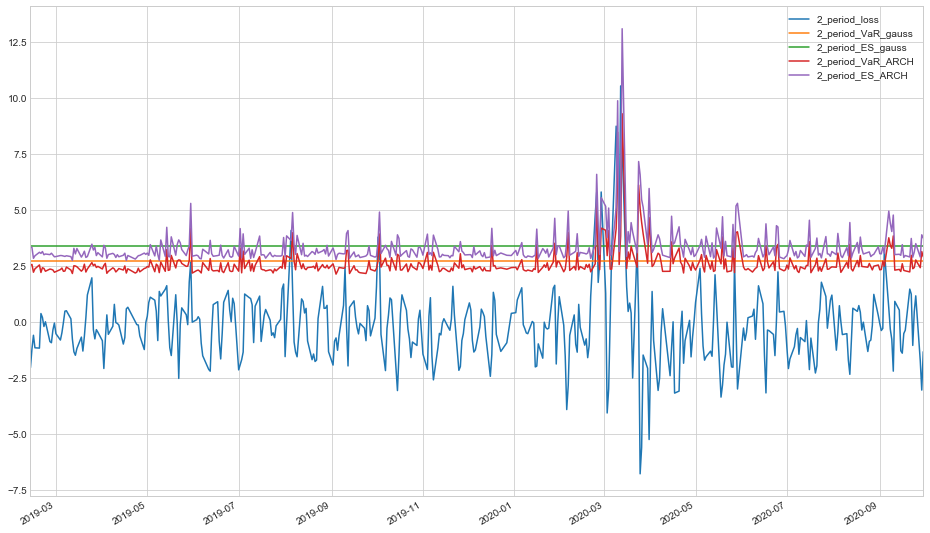

In [15]:
vares_df = vares.VaRES(omega_hat,alpha_hat,df,'XACTC25',0.05,2,2000)
vares_df.plot(figsize = (16,10));

In [16]:
pftools.ana_optimal_portfolios(df)

-----------------------------------------------------------------------------------------------

The analytical solution for the minimum variance portfolio (allows for shorting) resulted in:

         weight
ticker         
SXR8     -13.19
XACTC25   73.19
XDJP      30.31
LCUA       9.70

With portfolio characteristics:

               stats
variance      319.50
std            17.87
return         19.06
sharpe-ratio    1.07

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

The analytical solution for the efficient tangent portfolio (allows for shorting) resulted in:

         weight
ticker         
SXR8     -11.74
XACTC25  167.84
XDJP     -35.82
LCUA     -20.28

With portfolio characteristics:

               stats
variance      545.88
std            23.36
return         32.57
sharpe-ratio    1.39

-----------------------------------------------

In [18]:
pftools.num_optimal_portfolios(df,100,True)

SHORTING IS ALLOWED
Will numerically solve the minimum variance portfolio

Multistart optimizing - prints everytime the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 100 - minvar portfolio - with w0 (initial guess) = [0.14, -0.85, 0.22, 0.79]

Weights converged at [-0.13, 0.73, 0.3, 0.1] with variance = 319.50.


Attempt 4 of 100 - minvar portfolio - with w0 (initial guess) = [-0.43, 0.52, -0.38, -0.12]

Weights converged at [-0.13, 0.73, 0.3, 0.1] with variance = 319.50.


-----------------------------------------------------------------------------------------------

The minvar portfolio from 100 total attempts (multistart) has converged with no notable differences the optimization outcome.
The optimal portfolio ended up being:

         weight
ticker         
SXR8     -13.19
XACTC25   73.19
XDJP      30.31
LCUA       9.70

With portfolio characteristics:

               stats
variance      319.

In [19]:
pftools.num_optimal_portfolios(df,100,False)

SHORTING IS NOT ALLOWED
Will numerically solve the minimum variance portfolio

Multistart optimizing - prints everytime the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 100 - minvar portfolio - with w0 (initial guess) = [0.57, 0.08, 0.61, 0.9]

Weights converged at [0.0, 0.69, 0.24, 0.06] with variance = 321.34.


Attempt 9 of 100 - minvar portfolio - with w0 (initial guess) = [0.51, 0.02, 0.85, 0.98]

Weights converged at [0.0, 0.69, 0.24, 0.06] with variance = 321.34.


Attempt 31 of 100 - minvar portfolio - with w0 (initial guess) = [0.26, 0.03, 0.31, 0.39]

Weights converged at [0.0, 0.69, 0.24, 0.06] with variance = 321.34.


Attempt 44 of 100 - minvar portfolio - with w0 (initial guess) = [0.28, 0.87, 0.8, 0.15]

Weights converged at [0.0, 0.69, 0.24, 0.06] with variance = 321.34.


Attempt 70 of 100 - minvar portfolio - with w0 (initial guess) = [0.15, 0.69, 0.87, 0.57]

Weights converged 

In [25]:
testdf = (df/df.shift(21)-1)*100
testdf.min()


SXR8      -32.515957
XACTC25   -27.106061
XDJP      -27.883212
LCUA      -25.858369
dtype: float64

In [26]:
df

,SXR8,XACTC25,XDJP,LCUA
Date,,,,
2010-05-28,92.80,NaN,NaN,NaN
2010-05-31,92.79,NaN,NaN,NaN
2010-06-01,92.32,NaN,NaN,NaN
2010-06-02,91.78,NaN,NaN,NaN
2010-06-04,91.56,NaN,NaN,NaN
2010-06-07,90.16,NaN,NaN,NaN
2010-06-08,89.38,NaN,NaN,NaN
2010-06-29,90.23,NaN,NaN,NaN
2010-07-06,86.99,NaN,NaN,NaN


In [31]:
df[:-756]

,SXR8,XACTC25,XDJP,LCUA
Date,,,,
2010-05-28,92.80,NaN,NaN,NaN
2010-05-31,92.79,NaN,NaN,NaN
2010-06-01,92.32,NaN,NaN,NaN
2010-06-02,91.78,NaN,NaN,NaN
2010-06-04,91.56,NaN,NaN,NaN
2010-06-07,90.16,NaN,NaN,NaN
2010-06-08,89.38,NaN,NaN,NaN
2010-06-29,90.23,NaN,NaN,NaN
2010-07-06,86.99,NaN,NaN,NaN


In [25]:
# from scipy import optimize
# logrdf = np.log(df).diff().dropna()*100
# sigma = logrdf.cov()*252
# mu = logrdf.mean()*252
# names = df.columns
# optimize_pf('minvar',sigma,mu,100,True)

Will numerically solve the minimum variance portfolio
-----------------------------------------------------------------------------------------------
Attempt 1 - minvar portfolio - with w0 (initial guess) = [0.14, -0.85, 0.22, 0.79]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.


Attempt 2 - minvar portfolio - with w0 (initial guess) = [0.09, 0.41, -0.23, 0.3]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.


Attempt 3 - minvar portfolio - with w0 (initial guess) = [0.38, 0.44, 0.38, 0.61]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.


Attempt 4 - minvar portfolio - with w0 (initial guess) = [-0.43, 0.52, -0.38, -0.12]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.


Attempt 5 - minvar portfolio - with w0 (initial guess) = [0.11, -0.13, 0.16, 0.78]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.




C:\Users\olufk\OneDrive\Documents\GitHub\PortfolioDesign\PortfolioDesign\OptimalPF\pftools.py:251: RuntimeWarning: divide by zero encountered in true_divide
  nw = w/sum(w)


Attempt 37 - minvar portfolio - with w0 (initial guess) = [-0.71, -0.9, 0.67, -0.74]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.


Attempt 49 - minvar portfolio - with w0 (initial guess) = [-0.62, -0.15, -0.7, -0.07]

Weights converged at [0.3, 0.19, -0.04, 0.55] with variance = 287.88.


-----------------------------------------------------------------------------------------------

The minvar portfolio from 100 total attempts (multistart) has converged with no notable differences the optimization outcome.
The optimal portfolio ended up being:

           weight
ticker           
fortum.he   29.60
danske.co   19.02
saf.pa      -4.07
wm          55.44

With portfolio characteristics:

               stats
variance      287.88
std            16.97
return         15.02
sharpe-ratio    0.89

-----------------------------------------------------------------------------------------------


(           weight
 ticker           
 fortum.he   29.60
 danske.co   19.02
 saf.pa      -4.07
 wm          55.44,                stats
 variance      287.88
 std            16.97
 return         15.02
 sharpe-ratio    0.89)